In [140]:
# IMAGE: 0
# ARROW_ID: 0, 1, 4


# BAD WITH (image, arrow): (1, 4)
# => add more keypoints in order to avoid to split its cluster

In [141]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [142]:
dataset_dir_path = "/home/nricciardi/Repositories/diagram/dataset/source/fa"

In [143]:
train_info = {}
with open(os.path.join(dataset_dir_path, "train.json")) as f:
    train_info = json.load(f)

print(train_info.keys())

dict_keys(['images', 'annotations', 'categories'])


In [144]:
image_index = 0

image = train_info["images"][image_index]
print(image)
image_path = os.path.join(dataset_dir_path, "train", image["file_name"])

{'file_name': 'writer000_fa_001.png', 'height': 994, 'width': 1333, 'id': 0}


<class 'numpy.ndarray'>
(994, 1333)


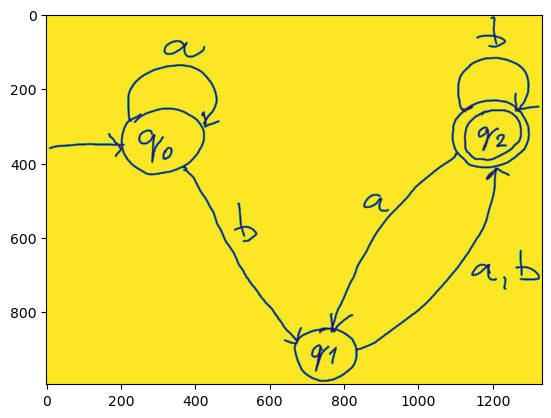

In [145]:
# --- STEP 1: Load image and define subregion ---
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(type(image))
print(image.shape)
plt.imshow(image)

In [146]:
image_annotations = []
for annotation in train_info["annotations"]:
    if annotation["image_id"] == image_index:
        image_annotations.append(annotation)

print(len(image_annotations))
print(image_annotations)

17
[{'id': 0, 'image_id': 0, 'category': 'text', 'category_id': 2, 'area': 8554, 'bbox': [247, 309, 94, 91], 'iscrowd': 0, 'keypoints': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'aid': 0, 'text': 'q0'}, {'id': 1, 'image_id': 0, 'category': 'text', 'category_id': 2, 'area': 5586, 'bbox': [315, 69, 114, 49], 'iscrowd': 0, 'keypoints': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'aid': 1, 'text': 'a'}, {'id': 2, 'image_id': 0, 'category': 'text', 'category_id': 2, 'area': 7020, 'bbox': [504, 506, 65, 108], 'iscrowd': 0, 'keypoints': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'aid': 2, 'text': 'b'}, {'id': 3, 'image_id': 0, 'category': 'text', 'category_id': 2, 'area': 3650, 'bbox': [851, 482, 73, 50], 'iscrowd': 0, 'keypoints': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'aid': 3, 'text': 'a'}, {'id': 4, 'image_id': 0, 'category': 'text', 'category_id': 2, 'area': 20274, 'bbox': [1142, 633, 186, 109], 'iscrowd': 0, 'keypoints': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'aid': 4, 'text': 'a,b'}, {'id': 5, 'image_id': 0, 'category': 'text', 'ca

In [147]:
image_arrow_annotations = []

for annotation in image_annotations:
    if annotation["category"] == "arrow":
        image_arrow_annotations.append(annotation)

print(len(image_arrow_annotations))
print(image_arrow_annotations)

6
[{'id': 8, 'image_id': 0, 'category': 'arrow', 'category_id': 3, 'area': 13455, 'bbox': [6, 319, 207, 65], 'iscrowd': 0, 'keypoints': [8.91, 359.835, 2.0, 209.395, 350.038, 2.0], 'arrow_next': 14, 'aid': 8}, {'id': 9, 'image_id': 0, 'category': 'arrow', 'category_id': 3, 'area': 43000, 'bbox': [218, 134, 250, 172], 'iscrowd': 0, 'keypoints': [228.998, 286.799, 2.0, 426.809, 301.941, 2.0], 'arrow_prev': 14, 'arrow_next': 14, 'aid': 9}, {'id': 10, 'image_id': 0, 'category': 'arrow', 'category_id': 3, 'area': 152154, 'bbox': [368, 415, 321, 474], 'iscrowd': 0, 'keypoints': [370.674, 418.62, 2.0, 671.846, 884.446, 2.0], 'arrow_prev': 14, 'arrow_next': 15, 'aid': 10}, {'id': 11, 'image_id': 0, 'category': 'arrow', 'category_id': 3, 'area': 168295, 'bbox': [761, 372, 347, 485], 'iscrowd': 0, 'keypoints': [1104.002, 375.867, 2.0, 767.188, 853.272, 2.0], 'arrow_prev': 16, 'arrow_next': 15, 'aid': 11}, {'id': 12, 'image_id': 0, 'category': 'arrow', 'category_id': 3, 'area': 206492, 'bbox': [8

In [148]:
sample_arrow_index = 4

sample_arrow_bbox = image_arrow_annotations[sample_arrow_index]["bbox"]
x, y, width, height = sample_arrow_bbox
print(sample_arrow_bbox)


sample_arrow_keypoints = []
current_keypoint = []
for keypoint_coord in image_arrow_annotations[sample_arrow_index]["keypoints"]:
    if len(current_keypoint) == 2:
        sample_arrow_keypoints.append(current_keypoint)
        current_keypoint = []

    current_keypoint.append(keypoint_coord)

sample_arrow_keypoints.append(current_keypoint)

print(sample_arrow_keypoints)

[829, 412, 418, 494]
[[832.234, 902.26], [2.0, 1213.6], [415.057, 2.0]]


(494, 418)


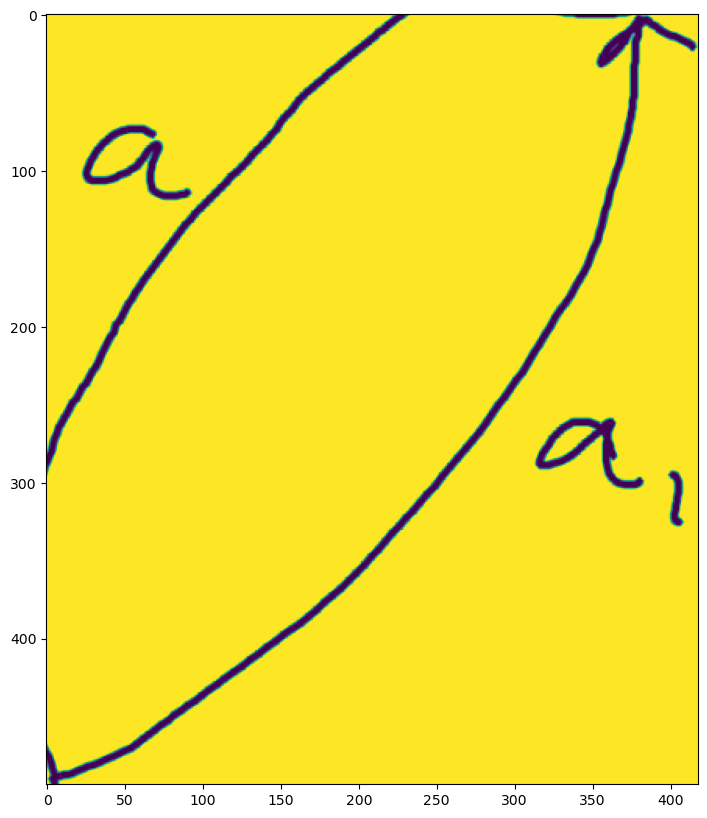

In [149]:
arrow_subregion = image[y:y+height, x:x+width]
print(arrow_subregion.shape)
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion)

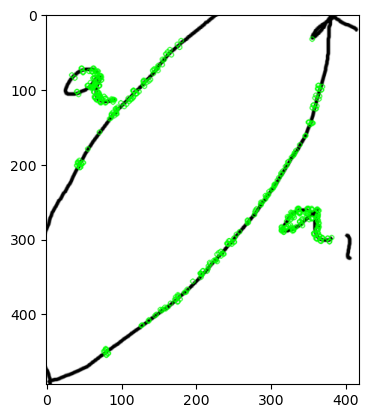

In [150]:
# --- STEP 2: Detect keypoints ---

# --- ORB ---
orb = cv2.ORB_create()
orb_keypoints, descriptors = orb.detectAndCompute(arrow_subregion, None)

if len(orb_keypoints) == 0:
    print("No keypoints detected.")
else:
    arrow_subregion_with_keypoints = cv2.drawKeypoints(arrow_subregion, orb_keypoints, None, color=(0, 255, 0))
    plt.imshow(arrow_subregion_with_keypoints)

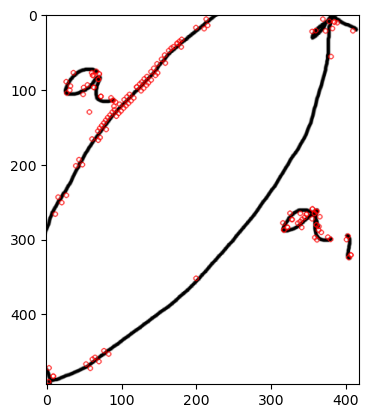

In [151]:
# --- SIFT ---
orb = cv2.SIFT_create()
sift_keypoints, descriptors = orb.detectAndCompute(arrow_subregion, None)

if len(sift_keypoints) == 0:
    print("No keypoints detected.")
else:
    arrow_subregion_with_keypoints = cv2.drawKeypoints(arrow_subregion, sift_keypoints, None, color=(255, 0, 0))
    plt.imshow(arrow_subregion_with_keypoints)

**TODO: add other keypoints algorithm or produce more keypoints using these**

In [152]:
# merge keypoints of multiple algorithm to obtain more points (more robust)

keypoints = [
    orb_keypoints,
    sift_keypoints
]

keypoints = [kp for x_keypoints in keypoints for kp in x_keypoints]

points = np.array([kp.pt for kp in keypoints])

In [153]:
# --- STEP 3: First clustering ---
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score


# --- Spectral Clustering ---

max_K = 10
best_score = -1
best_K = 2
scores = []
min_score_else_K_1 = 0.2

for K in range(2, max_K + 1):
    clustering = SpectralClustering(n_clusters=K, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans')
    labels = clustering.fit_predict(points)
    
    score = silhouette_score(points, labels)
    scores.append(score)
    
    print(f"K = {K}, silhouette score = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_K = K

if best_score < min_score_else_K_1:
    best_K = 1

print(f"Optimal K found: {best_K}")

/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K = 2, silhouette score = 0.2420
K = 3, silhouette score = 0.1476
K = 4, silhouette score = 0.3452
K = 5, silhouette score = 0.0334
K = 6, silhouette score = -0.0503


/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connecte

K = 7, silhouette score = 0.1105
K = 8, silhouette score = 0.2396
K = 9, silhouette score = 0.1084
K = 10, silhouette score = 0.1064
Optimal K found: 4


In [154]:
if best_K == 1:
    final_labels = np.zeros(len(points), dtype=int)
else:
    final_clustering = SpectralClustering(n_clusters=best_K, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans')
    final_labels = final_clustering.fit_predict(points)

/home/nricciardi/.conda/envs/mldl/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


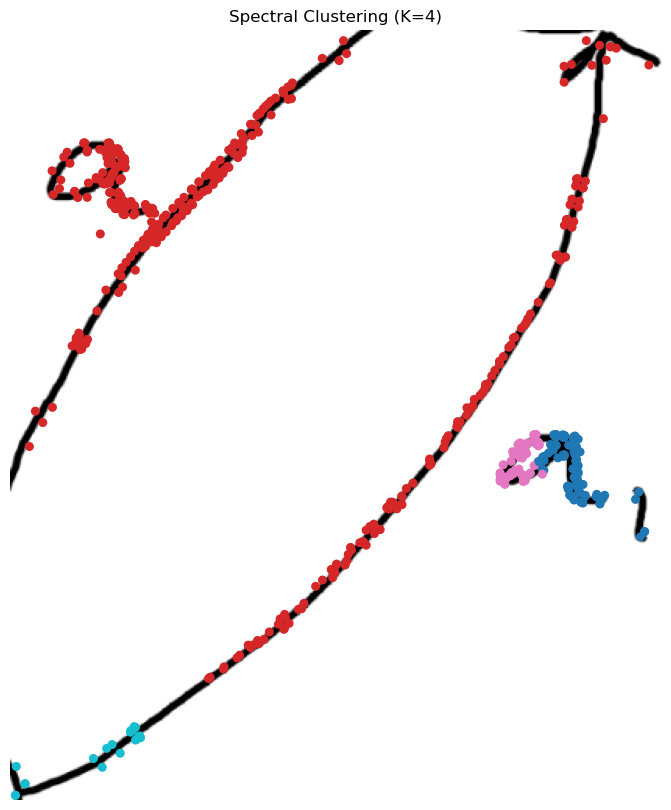

In [155]:
# show clusters

arrow_subregion_rgb = cv2.cvtColor(arrow_subregion, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion_rgb)

plt.scatter(points[:, 0], points[:, 1], c=final_labels, cmap='tab10', s=30)

plt.title(f"Spectral Clustering (K={best_K})")
plt.axis('off')
plt.show()

**Spectral clustering DOESN'T work!!!**

=> we use DBSCAN

In [156]:
# --- DBSCAN ---
from sklearn.cluster import DBSCAN


# TODO: finetune
EPS = 100  # maximum distance between two samples for them to be considered as in the same neighborhood
# another good value: 70
MIN_SAMPLES = 1  # minimum number of points to form a dense region
# NOTE: if MIN_SAMPLES > 1 => we exclude single points, but if MIN_SAMPLES == 1 => single points may create standalone clusters based on EPS
# TODO: EPS is very very very important, too large EPS may include trash signs into arrow cluster

def apply_dbscan_clustering(points, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(points)

    return labels

labels = apply_dbscan_clustering(points, EPS, MIN_SAMPLES)

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"DBSCAN found {num_clusters} cluster(s).")

DBSCAN found 2 cluster(s).


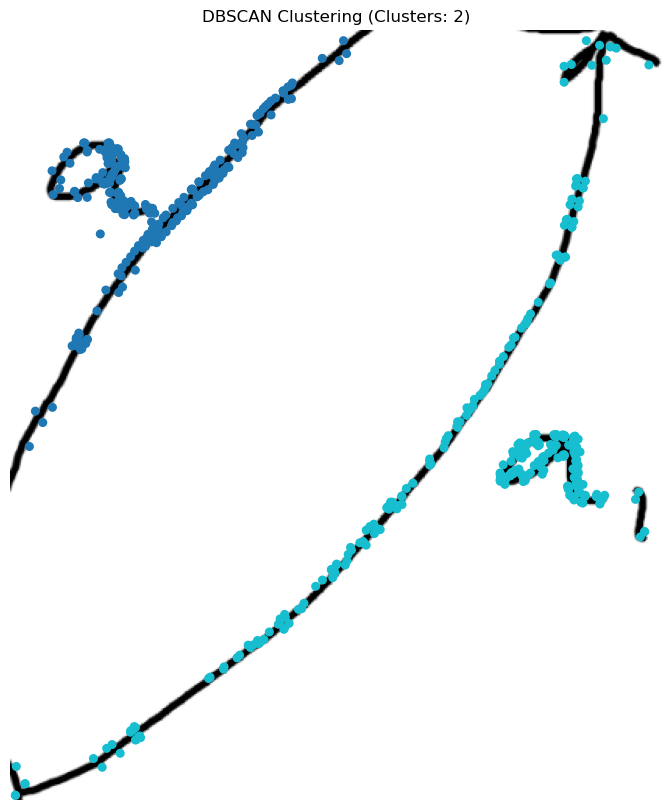

In [157]:
arrow_subregion_rgb = cv2.cvtColor(arrow_subregion, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion_rgb)

# Map noise points (-1) to a specific color (e.g., black)
color_labels = np.copy(labels)
color_labels[color_labels == -1] = num_clusters  # assign noise a new color index

plt.scatter(points[:, 0], points[:, 1], c=color_labels, cmap='tab10', s=30)
plt.title(f"DBSCAN Clustering (Clusters: {num_clusters})")
plt.axis('off')
plt.show()

In [158]:
# --- STEP 4: Take most wide cluster with ConvexHull ---

from scipy.spatial import ConvexHull


unique_labels = set(labels) - {-1}

max_area = 0
largest_cluster_label = None
largest_cluster_points = None
largest_hull = None

for label in unique_labels:
    cluster_points = points[labels == label]
    
    if len(cluster_points) >= 3:  # at least 3 points to build a Convex Hull
        try:
            hull = ConvexHull(cluster_points)
            area = hull.volume  # For 2D, 'volume' is area of Convex Hull
            if area > max_area:
                max_area = area
                largest_cluster_label = label
                largest_cluster_points = cluster_points
                largest_hull = hull
        except:
            continue    # ignore invalid cluster for convex hull

largest_cluster_label_with_largest_convexhull = largest_cluster_label.copy()
largest_cluster_points_with_largest_convexhull = largest_cluster_points.copy()


Cluster with max area: 1; area = 77854.97


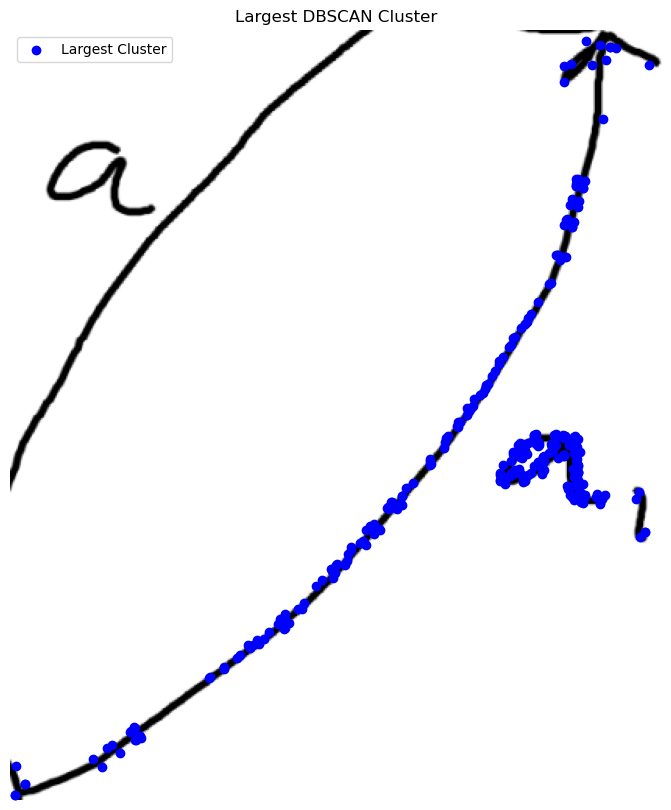

In [159]:
if largest_cluster_points is not None:
    print(f"Cluster with max area: {largest_cluster_label}; area = {max_area:.2f}")
    
    plt.figure(figsize=(10, 10))
    plt.imshow(arrow_subregion_rgb)
    plt.scatter(largest_cluster_points[:, 0], largest_cluster_points[:, 1], c='blue', label='Largest Cluster')
    plt.title('Largest DBSCAN Cluster')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis('off')
    plt.legend()
    plt.show()
else:
    print("No valid cluster found.")

In [160]:
def draw_bbox(plt, x_min, y_min, x_max, y_max, edgecolor="purple"):
    width = x_max - x_min
    height = y_max - y_min
    rect = plt.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=edgecolor, facecolor='none')
    plt.gca().add_patch(rect)

Largest cluster label: 1 with area = 196773.31
Max coors: [409.39736938 490.48150635]
Min coors: [2.95865178 6.34133291]


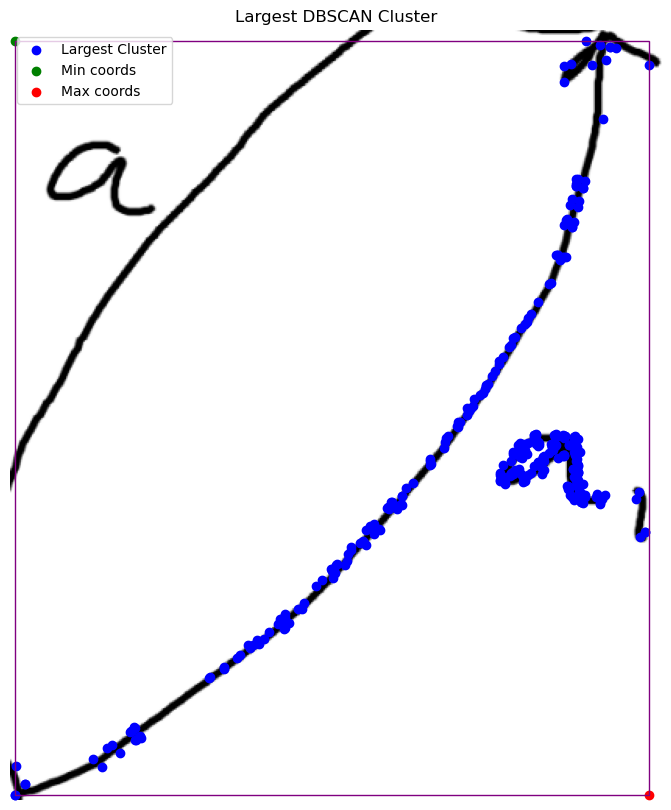

In [161]:
# --- Take most wide cluster with largest bbox --- 

def compute_bbox_of_points(points_):
    min_coords = points_.min(axis=0)
    max_coords = points_.max(axis=0)

    return min_coords, max_coords


unique_labels = set(labels) - {-1}

# Initialize variables for the largest cluster
max_area = 0
largest_cluster_label = None
largest_cluster_points = None
min_coords_of_largest = None
max_coords_of_largest = None

# Compute the bounding box for each cluster
for label in unique_labels:
    cluster_points = points[labels == label]
    
    min_coords, max_coords = compute_bbox_of_points(cluster_points)
    area = np.prod(max_coords - min_coords)
    
    if area > max_area:
        max_area = area
        largest_cluster_label = label
        largest_cluster_points = cluster_points
        min_coords_of_largest = min_coords
        max_coords_of_largest = max_coords

if largest_cluster_points is not None:
    print(f"Largest cluster label: {largest_cluster_label} with area = {max_area:.2f}")
    print(f"Max coors: {max_coords}")
    print(f"Min coors: {min_coords}")
    
    plt.figure(figsize=(10, 10))
    plt.imshow(arrow_subregion_rgb)
    plt.scatter(largest_cluster_points[:, 0], largest_cluster_points[:, 1], c='blue', label='Largest Cluster')

    plt.scatter(min_coords_of_largest[0], min_coords_of_largest[1], c="green", label="Min coords")
    plt.scatter(max_coords_of_largest[0], max_coords_of_largest[1], c="red", label="Max coords")

    draw_bbox(plt, *min_coords_of_largest, *max_coords_of_largest)

    plt.title('Largest DBSCAN Cluster')
    plt.axis('off')
    plt.legend()
    plt.show()
else:
    print("No valid cluster found.")

largest_cluster_label_with_largest_bboxes = largest_cluster_label.copy()
largest_cluster_points_with_largest_bboxes = largest_cluster_points.copy()


In [162]:
# TODO: ....

if largest_cluster_label_with_largest_bboxes != largest_cluster_label_with_largest_convexhull:
    print("Clustering filtering methods have taken two different clusters... introduce another one method?")

In [163]:
assert (largest_cluster_points_with_largest_bboxes == largest_cluster_points_with_largest_convexhull).all()

largest_cluster_points = largest_cluster_points_with_largest_bboxes

In [164]:
# --- CIRCULARITY ---

largest_hull_area = largest_hull.area 
largest_hull_perimeter = largest_hull.volume

if largest_hull_perimeter != 0:
    largest_hull_circularity = 4 * np.pi * largest_hull_area / (largest_hull_perimeter ** 2)

    print(f"Area: {largest_hull_area:.4f}")
    print(f"Perimeter: {largest_hull_perimeter:.4f}")
    print(f"Circularity: {largest_hull_circularity:.4f}")

else:
    print("WARN: perimeter is ZERO")

Area: 1391.7973
Perimeter: 77854.9715
Circularity: 0.0000


In [165]:
import alphashape
from shapely.geometry import Polygon


ALPHA = 1.0 # TODO: finetune

shape = alphashape.alphashape(largest_cluster_points, ALPHA)

area = shape.area
perimeter = shape.length

circularity = 0
if perimeter != 0:
    circularity = 4 * np.pi * area / (perimeter ** 2)

    print(f"Area: {area:.2f}")
    print(f"Perimeter: {perimeter:.2f}")
    print(f"Circularity: {circularity:.4f}")

else:
    print("WARN: perimeter is ZERO")

Area: 21.05
Perimeter: 116.02
Circularity: 0.0196


In [166]:
CIRCULARITY_THRESHOLD = 0.1     # TODO: finetune

self_arrow = circularity > CIRCULARITY_THRESHOLD
if self_arrow:
    print("SELF ARROW!!")

In [167]:
from scipy.spatial.distance import cdist

def extremity_points(points_):
    dist_matrix = cdist(points_, points_)
    max_idx_flat = np.argmax(dist_matrix)
    i, j = np.unravel_index(max_idx_flat, dist_matrix.shape)

    point_A, point_B = points_[i], points_[j]

    return point_A, point_B


point_A, point_B = extremity_points(largest_cluster_points)

print(f"Point with max distance (maybe arrow extremity): {point_A} -> {point_B}")

Point with max distance (maybe arrow extremity): [  2.95865178 490.48150635] -> [409.39736938  21.94454765]


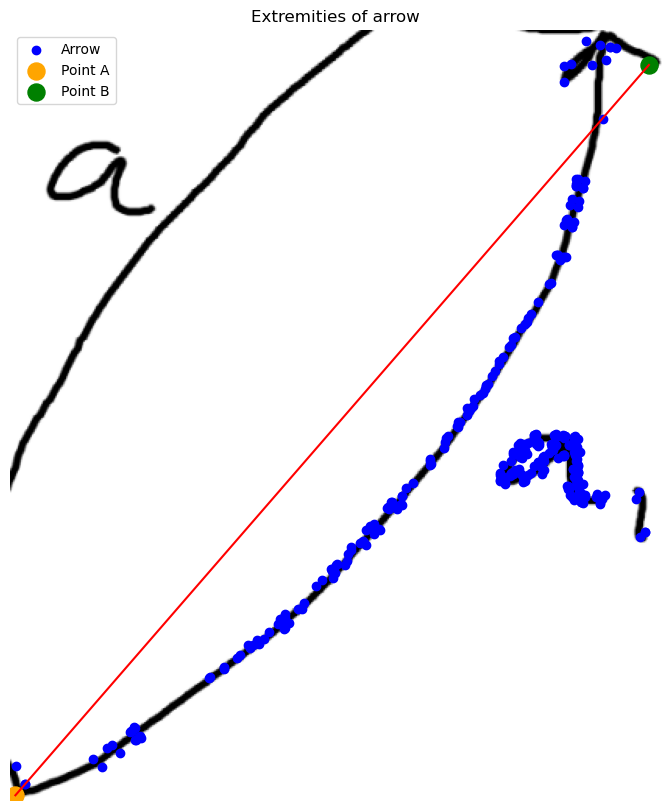

In [168]:
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion_rgb)
plt.scatter(largest_cluster_points[:, 0], largest_cluster_points[:, 1], c='blue', label='Arrow')

plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'r-')
plt.scatter(point_A[0], point_A[1], c="orange", label="Point A", s=150)
plt.scatter(point_B[0], point_B[1], c="green", label="Point B", s=150)

plt.title('Extremities of arrow')
plt.axis('off')
plt.legend()
plt.show()

In [169]:
def get_neighbor_points(center, points, radius) -> list:
    distances = np.linalg.norm(points - center, axis=1)
    return points[distances <= radius].copy()

In [170]:
arrow_subregion_area = arrow_subregion.shape[0] * arrow_subregion.shape[1]
arrow_subregion_perimeter = 2 * (arrow_subregion.shape[0] + arrow_subregion.shape[1])

print(arrow_subregion_area)
print(arrow_subregion_perimeter)

RADIUS_MULTIPLIER = arrow_subregion_perimeter / 1000
RADIUS = 40 * RADIUS_MULTIPLIER       # TODO: finetune, a good RADIUS is 65
print(f"RADIUS: {RADIUS}")

neighbor_of_A = get_neighbor_points(point_A, points, RADIUS)
neighbor_of_B = get_neighbor_points(point_B, points, RADIUS)

# only for show them, do not compute else
extremity_of_A_neighborhood = extremity_points(neighbor_of_A)
extremity_of_B_neighborhood = extremity_points(neighbor_of_B)

print(len(extremity_of_A_neighborhood), extremity_of_A_neighborhood)
print(len(extremity_of_B_neighborhood), extremity_of_B_neighborhood)

206492
1824
RADIUS: 72.96000000000001
2 (array([  2.95865178, 490.48150635]), array([ 70.21076965, 463.52880859]))
2 (array([355.,  33.]), array([409.39736938,  21.94454765]))


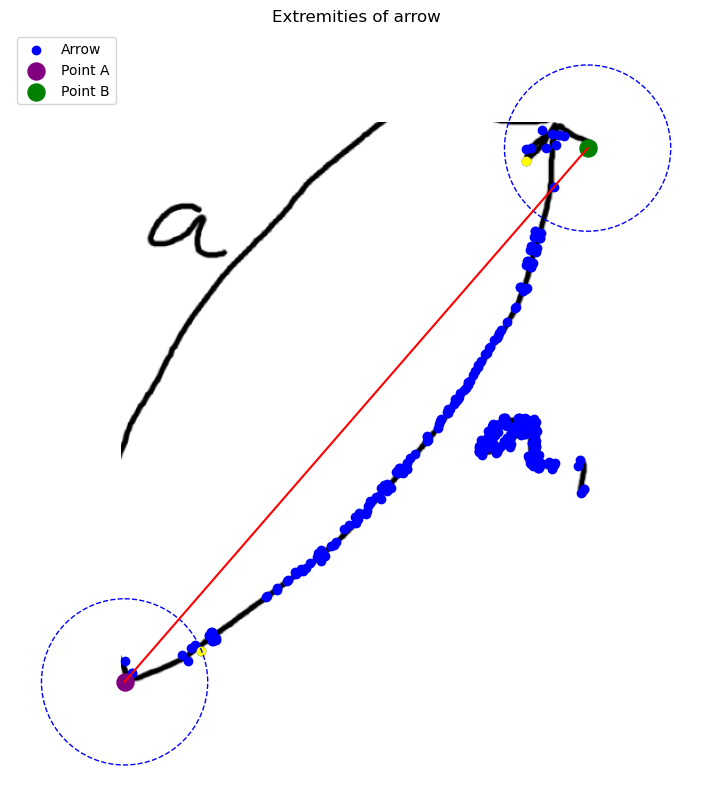

In [171]:
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion_rgb)
plt.scatter(largest_cluster_points[:, 0], largest_cluster_points[:, 1], c='blue', label='Arrow')


for neighbor in extremity_of_A_neighborhood:
    plt.scatter(neighbor[0], neighbor[1], c='yellow')

for neighbor in extremity_of_B_neighborhood:
    plt.scatter(neighbor[0], neighbor[1], c='yellow')

plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'r-')
plt.scatter(point_A[0], point_A[1], c="purple", label="Point A", s=150)
plt.scatter(point_B[0], point_B[1], c="green", label="Point B", s=150)

circle = plt.Circle(point_A, RADIUS, color='blue', fill=False, linestyle='--')
plt.gca().add_patch(circle)
circle = plt.Circle(point_B, RADIUS, color='blue', fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.title('Extremities of arrow')
plt.axis('off')
plt.legend()
plt.show()

In [172]:
min_coords_of_A, max_coords_of_A = compute_bbox_of_points(neighbor_of_A)
min_coords_of_B, max_coords_of_B = compute_bbox_of_points(neighbor_of_B)

area_bbox_A = np.prod(max_coords_of_A - min_coords_of_A)
area_bbox_B = np.prod(max_coords_of_B - min_coords_of_B)

print(area_bbox_A)
print(area_bbox_B)

2190.5292187172163
2724.7317387873773


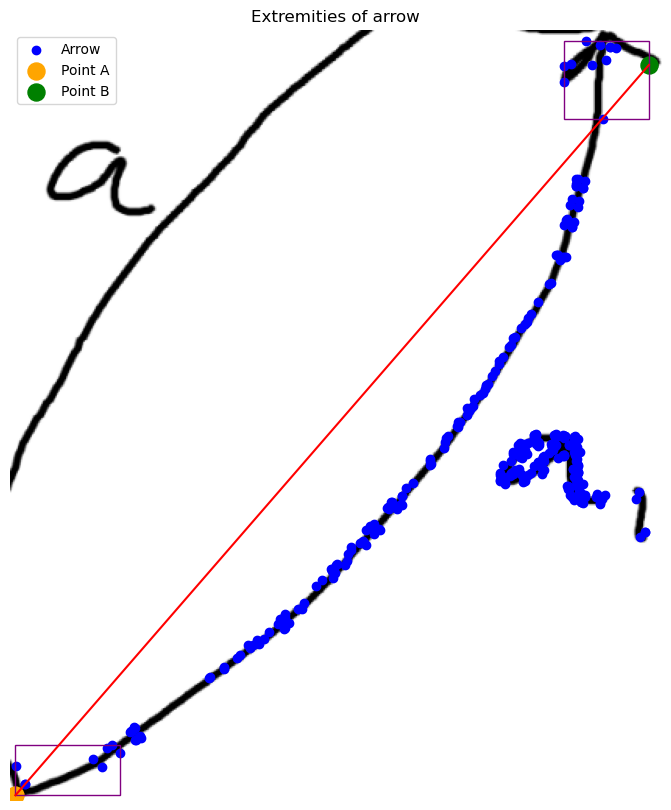

In [173]:
plt.figure(figsize=(10, 10))
plt.imshow(arrow_subregion_rgb)
plt.scatter(largest_cluster_points[:, 0], largest_cluster_points[:, 1], c='blue', label='Arrow')

plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'r-')
plt.scatter(point_A[0], point_A[1], c="orange", label="Point A", s=150)
plt.scatter(point_B[0], point_B[1], c="green", label="Point B", s=150)

draw_bbox(plt, *min_coords_of_A, *max_coords_of_A)
draw_bbox(plt, *min_coords_of_B, *max_coords_of_B)


plt.title('Extremities of arrow')
plt.axis('off')
plt.legend()
plt.show()

In [174]:
A_is_head = None
B_is_head = None

In [175]:
print(f"Self arrow? {self_arrow}")
print("Arrow extremities: ")
print(point_A, f"\t is head? {A_is_head}")
print(point_B, f"\t is head? {B_is_head}")

Self arrow? False
Arrow extremities: 
[  2.95865178 490.48150635] 	 is head? None
[409.39736938  21.94454765] 	 is head? None
